
=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       211
           1       0.55      0.86      0.67         7
           2       1.00      1.00      1.00        15
           3       0.88      0.75      0.81        20
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00        28
           6       0.00      0.00      0.00        15

    accuracy                           0.85       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.88      0.85      0.86       300



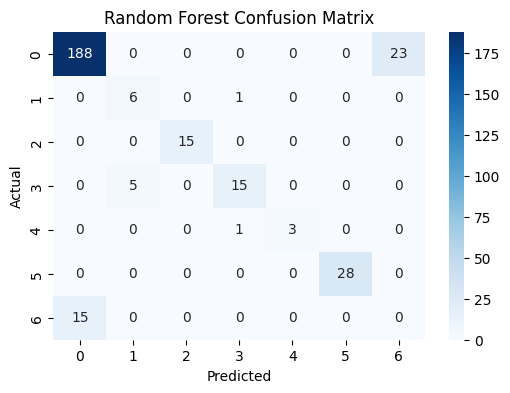


=== SVM Classification Report ===
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       211
           1       0.00      0.00      0.00         7
           2       0.88      1.00      0.94        15
           3       0.45      0.45      0.45        20
           4       0.00      0.00      0.00         4
           5       0.93      1.00      0.97        28
           6       0.00      0.00      0.00        15

    accuracy                           0.87       300
   macro avg       0.45      0.49      0.47       300
weighted avg       0.80      0.87      0.83       300



c:\Users\sapta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sapta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sapta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

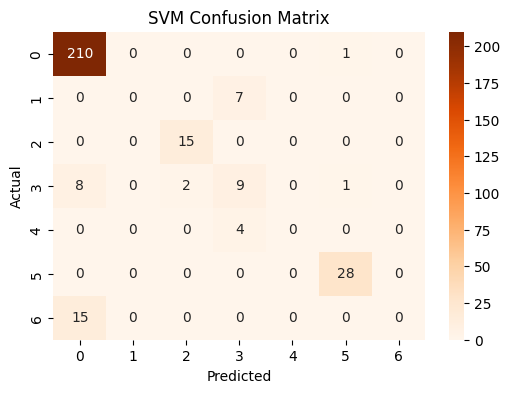


Label Encoding for Theft Classes:
0: Normal
1: Theft1
2: Theft2
3: Theft3
4: Theft4
5: Theft5
6: Theft6


In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\sapta\OneDrive\Desktop\DVC_Project\energy_data.csv")


# Drop unnamed or index-like column
df.drop(columns=['0'], inplace=True)

# Encode categorical columns
label_encoders = {}
for col in ['Class', 'Theft']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns='Theft')
y = df['Theft']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# =========================
# Random Forest Classifier
# =========================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\n=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_preds))

# Confusion Matrix - Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# =========================
# Support Vector Machine
# =========================
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("\n=== SVM Classification Report ===")
print(classification_report(y_test, svm_preds))

# Confusion Matrix - SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d', cmap='Oranges')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Label Mapping
print("\nLabel Encoding for Theft Classes:")
for idx, label in enumerate(label_encoders['Theft'].classes_):
    print(f"{idx}: {label}")
